In [ ]:
pip install -u pandas-datareader

In [ ]:
pip install statsmodels 

In [87]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import time
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [38]:
#get stock price
df = web.DataReader('ZM', data_source='yahoo', start='2018-01-01', end='2021-05-01')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-18,66.000000,60.320999,65.000000,62.000000,25764700,62.000000
2019-04-22,68.900002,59.939999,61.000000,65.699997,9949700,65.699997
2019-04-23,74.168999,65.550003,66.870003,69.000000,6786500,69.000000
2019-04-24,71.500000,63.160000,71.400002,63.200001,4973500,63.200001
2019-04-25,66.849998,62.599998,64.739998,65.000000,3863300,65.000000
...,...,...,...,...,...,...
2021-04-26,338.000000,329.209991,337.510010,336.420013,2286700,336.420013
2021-04-27,341.679993,330.890015,336.390015,333.489990,2208300,333.489990
2021-04-28,334.700989,326.045013,330.239990,331.250000,1437600,331.250000


In [39]:
df.shape

(513, 6)

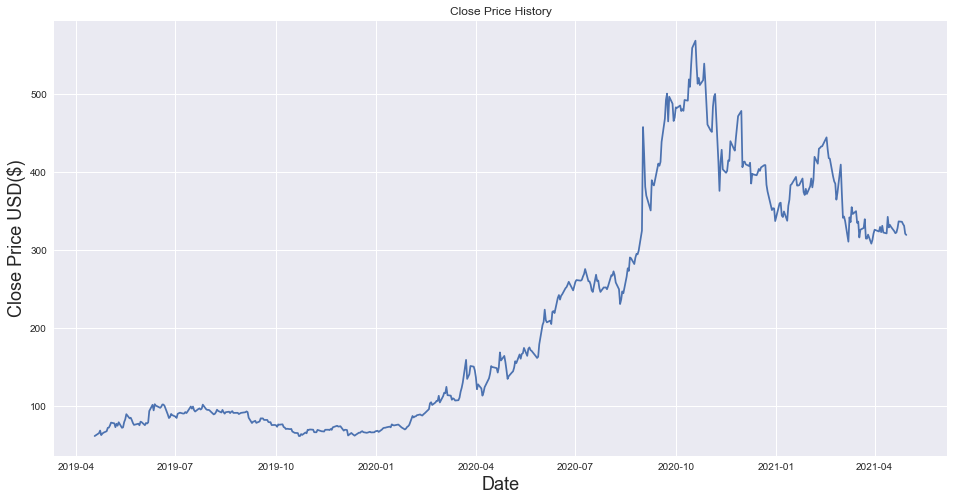

In [40]:
#plot
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [ ]:
# p = order of the AR term
# d = # of differencing required to make time series stationary
# q = the order of the MA term



In [41]:
df = df[['Close']].copy()

In [42]:
df.describe()

,Close
count,513.000000
mean,214.574766
std,145.645012
min,62.000000
25%,83.400002
50%,150.259995
75%,342.109985
max,568.340027


In [43]:
df.head()

,Close
Date,
2019-04-18,62.000000
2019-04-22,65.699997
2019-04-23,69.000000
2019-04-24,63.200001
2019-04-25,65.000000


In [44]:
#check price to check if time series is stationary

from statsmodels.tsa.stattools import adfuller
#ADF test will tell us if model is stationary. If p-value is greater than .05 we can conclude it is not stationary

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.9187079120462919
p-value: 0.7817492225743081


In [45]:
from statsmodels.graphics.tsaplots import plot_acf


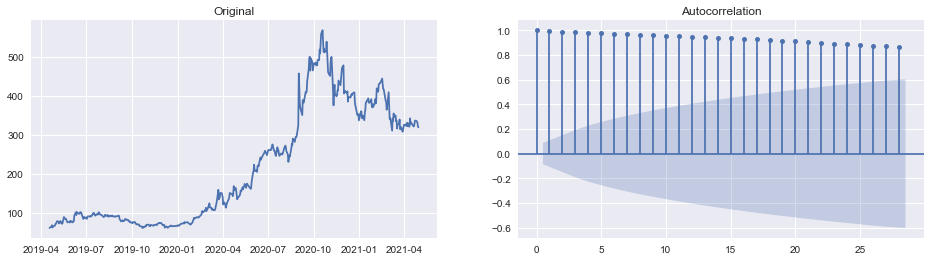

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close, ax=ax2);

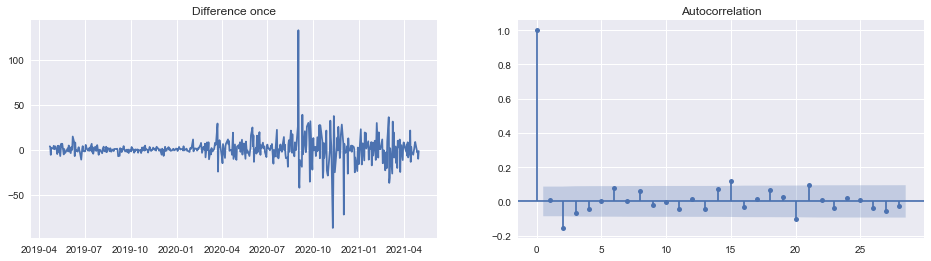

In [47]:
# check if we difference once

diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

In [ ]:
pip install pmdarima


In [48]:
from pmdarima.arima.utils import ndiffs

In [49]:
#double checking our # of difference on 'Close'

ndiffs(df.Close, test='adf')

1

In [ ]:
#Finding p. p is order of the Auto Regressive term. The # of lags to be used as a predictor

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf

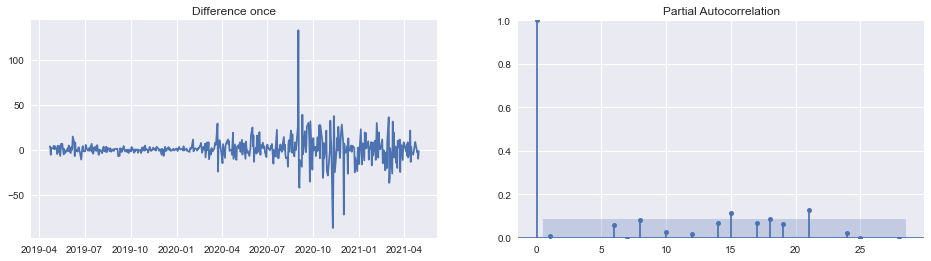

In [51]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

#we see 7, 9 16, 17 can be used as p terms

In [ ]:
#Finding q. q is order of the moving average. The # of lagged forecast errors that should go into ARIMA model

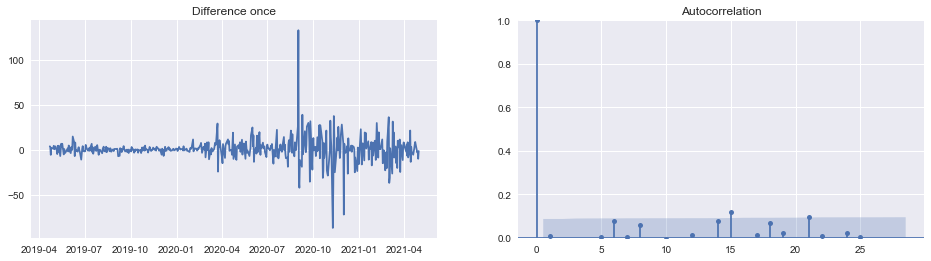

In [52]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

#we can see our q term could be 7, 9, 16

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#Starting ARIMA Model

In [ ]:
#Train test split

In [69]:
n = int(len(df) *0.8)
train = df.Close[:n]
test= df.Close[n:]

In [70]:
#check split correctly
print(len(train))
print(len(test))

410
103


In [95]:
model = ARIMA(train, order=(6, 1, 3))
result= model.fit(disp=False)

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

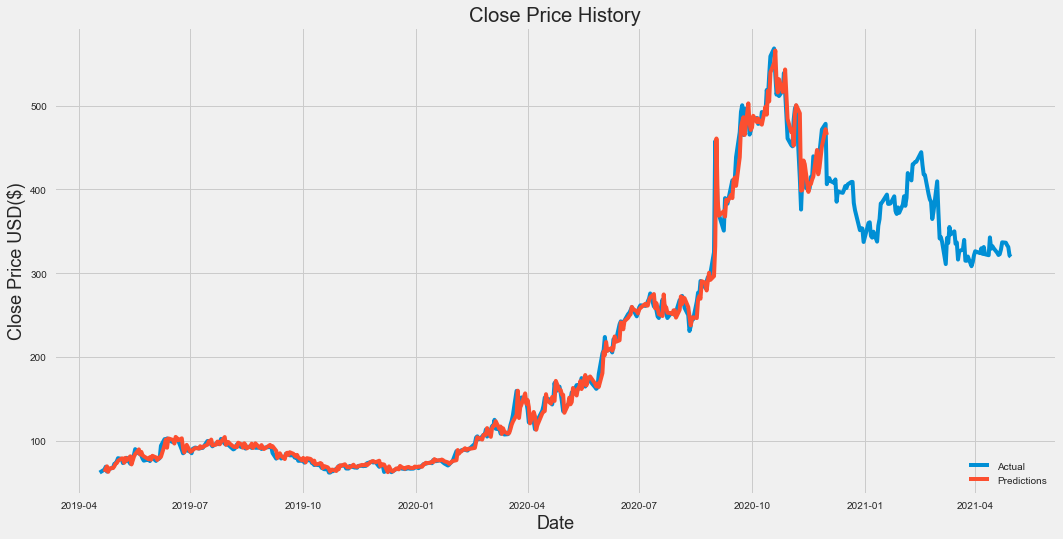

In [106]:
y_predict = result.predict(typ='levels')

#plot
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.plot(y_predict)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend(["Actual", "Predictions"], loc="lower right")
plt.show()

In [99]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  409
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -1598.092
Method:                       css-mle   S.D. of innovations             12.025
Date:                Wed, 12 May 2021   AIC                           3218.183
Time:                        20:17:50   BIC                           3262.334
Sample:                             1   HQIC                          3235.652
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8792      0.439      2.001      0.045       0.018       1.740
ar.L1.D.Close    -0.6597      0.318     -2.073      0.038      -1.283      -0.036
ar.L2.D.Close    -1.1319      0.215     -5.264      0.000      -1.553      -0.710
ar.L3.D.Close    -0.2763      0.352     -0.785      0.432      -0.966       0.413
ar.L4.D.Close    -0.3951      0.103     -3.851      0.000      -0.596      -0.194
ar.L5.D.Close    -0.1323      0.108     -1.229      0.219      -0.343       0.079
ar.L6.D.Close    -0.1417      0.055     -2.556      0.011      -0.250      -0.033
ma.L1.D.Close     0.7229      0.319      2.269      0.023       0.098       1.347
ma.L2.D.Close     0.9824      0.232      4.239      0.000       0.528       1.437
ma.L3.D.Close     0.0502      0.309      0.163      0.871      -0.555       0.655
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8594           -1.2977j            1.5565           -0.1569
AR.2            0.8594           +1.2977j            1.5565            0.1569
AR.3           -0.3261           -1.0493j            1.0988           -0.2980
AR.4           -0.3261           +1.0493j            1.0988            0.2980
AR.5           -0.9999           -1.1885j            1.5532           -0.3613
AR.6           -0.9999           +1.1885j            1.5532            0.3613
MA.1           -0.3537           -0.9648j            1.0276           -0.3059
MA.2           -0.3537           +0.9648j            1.0276            0.3059
MA.3          -18.8719           -0.0000j           18.8719           -0.5000
-----------------------------------------------------------------------------
"""

In [73]:
step = 60

fc, se, conf = result.forecast(step)

In [74]:
fc

array([411.23763055, 414.80153052, 417.4600255 , 419.51740708,
       421.17569949, 422.56902998, 423.78644785, 424.8870744 ,
       425.91016127, 426.88176825, 427.81919688, 428.73393394,
       429.63360568, 430.52327531, 431.40630437, 432.28492465,
       433.16061787, 434.03436775, 434.90682744, 435.77843053,
       436.64946491, 437.52012173, 438.39052787, 439.26076758,
       440.13089679, 441.00095265, 441.8709598 , 442.74093462,
       443.61088797, 444.48082706, 445.3507567 , 446.22068005,
       447.09059922, 447.96051563, 448.83043021, 449.70034356,
       450.5702561 , 451.4401681 , 452.31007974, 453.17999115,
       454.0499024 , 454.91981355, 455.78972462, 456.65963565,
       457.52954665, 458.39945763, 459.2693686 , 460.13927956,
       461.00919051, 461.87910145, 462.7490124 , 463.61892334,
       464.48883428, 465.35874522, 466.22865616, 467.0985671 ,
       467.96847804, 468.83838898, 469.70829992, 470.57821086])

In [75]:
fc = pd.Series(fc, index=test[:step].index)
lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)

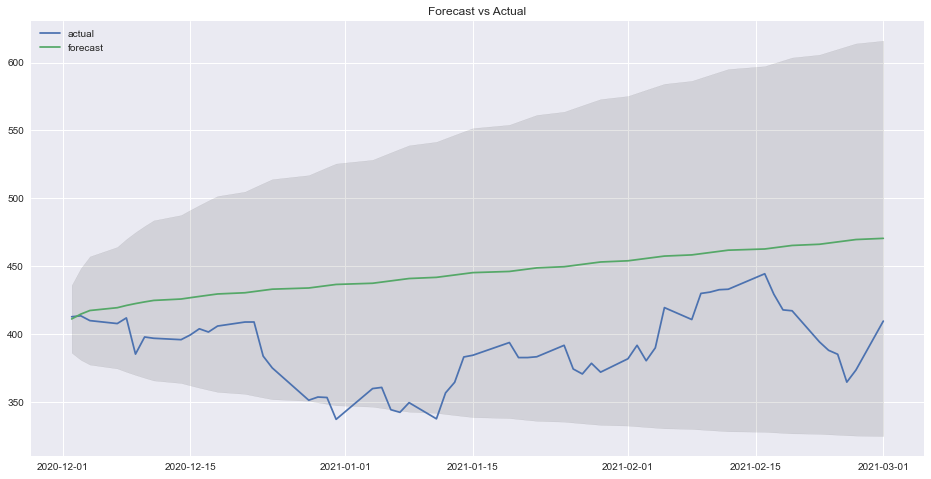

In [76]:
plt.figure(figsize=(16,8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

In [77]:
MSE = np.square(np.subtract(df['Close'],fc)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

62.1309657259918


In [97]:
MSE = np.square(np.subtract(df['Close'],y_predict)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

12.026459899801331
